In [ ]:
pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.9 MB 31.2 MB/s 
     |████████████████████████████████| 108 kB 68.5 MB/s 
     |████████████████████████████████| 604 kB 65.7 MB/s 
     |████████████████████████████████| 47.6 MB 1.3 MB/s 
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.6.0.66
    Uninstalling opencv-python-headless-4.6.0.66:
      Successfully uninstalled opencv-python-headless-4.6.0.66


In [ ]:
cd ./drive/MyDrive/data

/content/drive/MyDrive/data


In [ ]:
import cv2
import re
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
from sklearn.metrics import accuracy_score
import cv2
from google.colab.patches import cv2_imshow
import easyocr

In [ ]:
blocklist = '!"#$%&\'()*+,-./0123456789:;<=>?@[\\]^_`{|}~ㆍabcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ\n'
dataset = pd.read_csv('test.csv')[256:269]
img_size = 50
reader = easyocr.Reader(['ko'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.1% Complete

In [ ]:
def pre_processing(img):
  img = cv2.medianBlur(img, 5)
  if img.shape[1] > img.shape[0]:
    img = cv2.resize(img, dsize=(0, 0), fx=img_size/img.shape[0], fy=img_size/img.shape[0], interpolation=cv2.INTER_AREA)
  else:
    img = cv2.resize(img, dsize=(0, 0), fx=img_size/img.shape[1], fy=img_size/img.shape[1] * 2, interpolation=cv2.INTER_AREA)
  return img

In [ ]:
def recognize(src, reader, blocklist):
  # cv2_imshow(src)
  results = []

  for img in [src] + list(cv2.split(src)):
    result = reader.readtext(img, blocklist=blocklist, batch_size=256, link_threshold=1)
    total_confidence = 0
    merged_text = []

    last_x_pos = 0
    for pos, text, confidence in sorted(result, key=lambda x: x[0][0][0]):
      (tl, tr, br, bl) = pos
      tl = (int(tl[0]), int(tl[1]))
      br = (int(br[0]), int(br[1]))
      # if tl[0] < last_x_pos:
      #   break
      # else:
      #   last_x_pos = br[0]
      img = cv2.rectangle(img, tuple(map(int, tl)), tuple(map(int, br)), (0, 0, 0), 2)

      print(f'text : {text}, score : {confidence}')
      merged_text.append(text)
      total_confidence += confidence
    else:
      merged_text = ' '.join(merged_text)
      mean_confidence = total_confidence / len(result) if len(result) != 0 else 0
      results.append((mean_confidence, merged_text))
    cv2_imshow(img)

  # results.sort(key=lambda x: (x[0] >= 0.99, len(x[1].replace(' ', '')), x[0]))
  results.sort()
  result_text = results[-1][1] if results else ''
  print(f'final result : {result_text}')
  return result_text

In [ ]:
def post_processing(text):
  while True:
    temp = text.replace('  ', ' ')
    if temp == text:
      break
    text = temp
  
  num_blank = text.count(' ')
  if num_blank * 2 + 1 == len(text):
    text = text.replace(' ', '')
  return text

  0%|          | 0/13 [00:00<?, ?it/s]

---------- case #0 ----------
text : 에, score : 0.5520528539734393
text : 데, score : 0.3085715428260869
text : 턱, score : 0.9109666318897922
text : 스, score : 0.9998779334127903


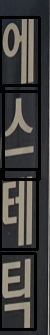

text : 에, score : 0.5453403442317182
text : 스, score : 0.9998897344469562
text : 데, score : 0.1607241365387333
text : 턱, score : 0.9608093193258505


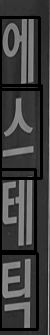

text : 에, score : 0.5708818732558463
text : 데, score : 0.7541549611950273
text : 턱, score : 0.9519001578972883
text : 스, score : 0.9998548083558632


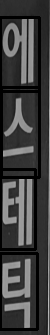

text : 에, score : 0.4965223610825298
text : 스, score : 0.9998836551176282
text : 데, score : 0.6243636585168133
text : 턱, score : 0.9374198350919904


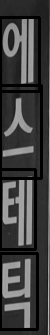

final result : 에 데 턱 스
---------- case #1 ----------
text : 한, score : 0.9984282475580954
text : 바, score : 0.9964677348452291
text : 벼, score : 0.9991959758114177
text : 원, score : 0.999754086355896
text : 성, score : 0.9874313340660059
text : 겨, score : 0.8870470783834072
text : 근, score : 0.08009888070157345
text : 이, score : 0.17999603374282547
text : 이, score : 0.028553153447319346


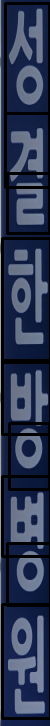

text : 성, score : 0.99544294483076
text : 한, score : 0.9966965822212757
text : 바, score : 0.9964486951659559
text : 원, score : 0.9996178515340404
text : 벼, score : 0.990183601746569
text : 곁, score : 0.5867512100260264
text : 이, score : 0.12942759090904943
text : 이, score : 0.11936188395234026


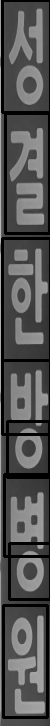

text : 한, score : 0.9984906650917225
text : 바, score : 0.9966720658531472
text : 벼, score : 0.9870566876834488
text : 원, score : 0.9893802143048767
text : 성, score : 0.9844621747604698
text : 곁, score : 0.7602856294177087
text : 이, score : 0.19106791976413717
text : 이, score : 0.1676334594987674


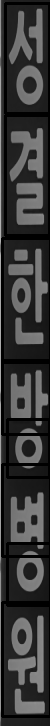

text : 한, score : 0.9965757884703272
text : 벼, score : 0.03823767912415921
text : 원, score : 0.9933800946785141
text : 바, score : 0.9926403773023118
text : 성, score : 0.9967059842094308
text : 곁, score : 0.7616705827715577
text : 어, score : 0.06730722952994483


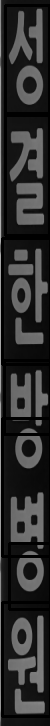

final result : 한 바 벼 원 성 곁 이 이
---------- case #2 ----------
text : 힘, score : 0.025019063987784307


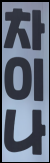

text : 힘, score : 0.022827299871899465


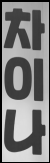

text : 힘, score : 0.03351522105653282


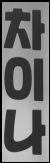

text : 힘, score : 0.03227372407035056


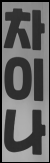

final result : 힘
---------- case #3 ----------
text : 뽑, score : 0.11934991990326527


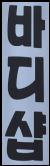

text : 뽑, score : 0.12245969448280025


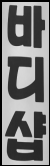

text : 뽑, score : 0.1394633748357741


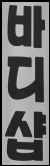

text : 답, score : 0.2986832576931455
text : 바, score : 0.9999102374193889


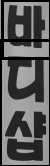

final result : 답 바
---------- case #4 ----------
text : 부, score : 0.9999657872265324
text : 동, score : 0.999792467395455
text : 산, score : 0.9973149540769919


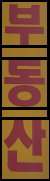

text : 부, score : 0.99131214403657
text : 제, score : 0.006008489535856365
text : 사, score : 0.07704434898144896


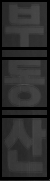

text : 부, score : 0.9999964237245109
text : 도, score : 0.03728270912815024


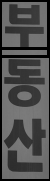

text : 동, score : 0.996141110557133
text : 산, score : 0.9971516178915785
text : 부, score : 0.9999190585303417


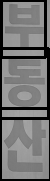

final result : 부 동 산
---------- case #5 ----------
text : 국, score : 0.5979383750735369
text : 약, score : 0.9999961853063724
text : 산, score : 0.9685623076174296
text : 새, score : 0.996800720640497
text : 부, score : 0.9999518400268812


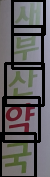

text : 국, score : 0.9999952316341023
text : 약, score : 0.999994277962287
text : 산, score : 0.9999606613213388
text : 새, score : 0.9999238267146247
text : 부, score : 0.999992728246557


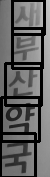

text : 국, score : 0.9916554643316532
text : 약, score : 0.9999949932161059
text : 산, score : 0.9867888146354692
text : 새, score : 0.9234154271534898
text : 부, score : 0.9863951005847618


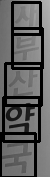

text : 국, score : 0.9999963045154381
text : 약, score : 0.9999959468882622
text : 산, score : 0.9999598268728995
text : 새, score : 0.9993891457052975
text : 부, score : 0.9999871254381674


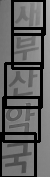

final result : 국 약 산 새 부
---------- case #6 ----------
text : 흥, score : 0.14566102254378066
text : 마, score : 0.9985697618681257
text : 로, score : 0.6144385054799528


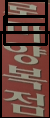

text : 양, score : 0.9974082833342415
text : 점, score : 0.999942422741956
text : 목, score : 0.114397506108177
text : 미, score : 0.9472903423986878
text : 로, score : 0.2048758443772023


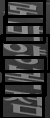

text : 올, score : 0.7949058365888995
text : 점, score : 0.9962733054732376
text : 미, score : 0.9801067458745685
text : 로, score : 0.3792422627573302


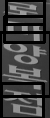

text : 점, score : 0.997637714954692
text : 볼, score : 0.5594273561939787
text : 도, score : 0.008826447740807597
text : 의, score : 0.10168619777765375


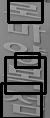

final result : 올 점 미 로
---------- case #7 ----------
text : 때 거, score : 0.5485248933242358


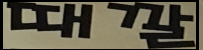

text : 때 거, score : 0.6955177511118358


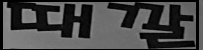

text : 때 거, score : 0.7122708958308437


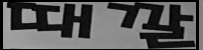

text : 때 거, score : 0.345458060503006


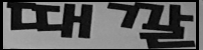

final result : 때 거
---------- case #8 ----------
text : 경호, score : 0.9411513362854693


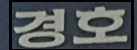

text : 경호, score : 0.9591357208852009


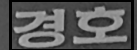

text : 경호, score : 0.9200532662198976


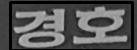

text : 경호, score : 0.9040995046858727


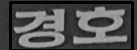

final result : 경호
---------- case #9 ----------
text : 태, score : 0.9541817218524926
text : 로, score : 0.16821291914223568


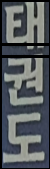

text : 태, score : 0.9927277938082604
text : 톤, score : 0.05916349331370441


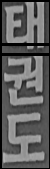

text : 태, score : 0.951143266247584
text : 로, score : 0.14610436265888893


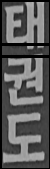

text : 태, score : 0.9695624163704366
text : 로, score : 0.04554968171535756


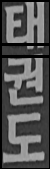

final result : 태 로
---------- case #10 ----------
text : 설, score : 0.9978065610938671
text : 타, score : 0.9983061578324772
text : 텅, score : 0.9153425730756339
text : 이, score : 0.01475449134181872


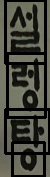

text : 설, score : 0.9979749451659359
text : 타, score : 0.9981086860607356
text : 텅, score : 0.9217094820110674
text : 이, score : 0.015214042951196272


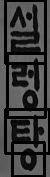

text : 설, score : 0.997199353258921
text : 타, score : 0.998251368772717
text : 텅, score : 0.9301323039144336
text : 이, score : 0.016646073372987624


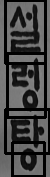

text : 설, score : 0.9976044951467635
text : 타, score : 0.9978496679686941
text : 텅, score : 0.9269568033169548
text : 이, score : 0.05899269302041632


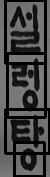

final result : 설 타 텅 이
---------- case #11 ----------
text : 값, score : 0.12176333527822081
text : 탕, score : 0.8778436342944964


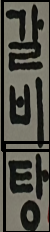

text : 값, score : 0.11548964217276136
text : 탕, score : 0.87161342760567


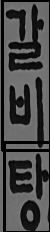

text : 값, score : 0.10746181203416327
text : 탕, score : 0.8887097527494667


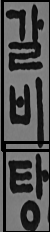

text : 값, score : 0.15413490032985067
text : 탕, score : 0.8814029219525423


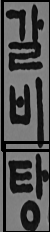

final result : 값 탕
---------- case #12 ----------


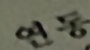

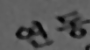

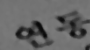

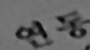

final result : 


In [ ]:
pred = []

for i, img_path in enumerate(tqdm(dataset.img_path)):
  print('-' * 10, f'case #{i}', '-' * 10)
  img = cv2.imread(img_path)
  img = pre_processing(img)
  text = recognize(img, reader, blocklist)
  text = post_processing(text)
  pred.append(text)